# Mensrights Prep: EDA, Lexicon Analysis, Sentiment Analysis and Export for modeling

Imports and overview of where the files are in relation to one another.

In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
pd.options.display.max_colwidth = 1000
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


#Files are seperated for organizational purposes there are two types of files submission files
#that are less text heavy and comments which are text heavy but also often are removed and contain messy html 

mypath='./data/mensrights/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

myotherpath='./data/women/'
onlyfiles1 = [f for f in listdir(myotherpath) if isfile(join(myotherpath, f))]

print(f"These are the files in mensrights:\n{onlyfiles}\
\n\n\nThese are the files in Femenism:\n{onlyfiles1}")

These are the files in mensrights:
['use1.csv', 'use10.csv', 'use2.csv', 'use3.csv', 'use4.5.csv', 'use4.csv', 'use6.csv', 'use7.csv', 'use9.csv']


These are the files in Femenism:
['test.csv', 'test11.csv', 'test12.csv', 'test13.csv', 'test2.csv', 'test3.csv', 'test4.csv', 'test5.csv', 'test6.csv', 'test7.csv', 'test8.csv', 'test9.csv']


Begin the bringing in of the files for the  Concat process 

In [2]:
first='use1.csv'# Name of file
one=pd.read_csv('./data/mensrights/'+first)#opening the file
one.drop('Unnamed: 0', axis=1, inplace=True)#dropping the old index which was later modified in the intial save
one.rename(columns={'body': 'text'},inplace=True)#uniform name for body and selftext
one.shape#confirming how many columns are in your dataframe

(100, 3)

In [3]:
second='use2.csv'
two =pd.read_csv('./data/mensrights/'+second)
two.drop('Unnamed: 0', axis=1, inplace=True)
two.rename(columns={'selftext': 'text'},inplace=True)
two.shape

(2000, 3)

In [4]:
third='use9.csv'
three=pd.read_csv('./data/mensrights/'+third)
three.drop('Unnamed: 0', axis=1, inplace=True)
three.rename(columns={'body': 'text'},inplace=True)
three.shape

(2000, 3)

In [5]:
third='use9.csv'
three=pd.read_csv('./data/mensrights/'+third)
three.drop('Unnamed: 0', axis=1, inplace=True)
three.rename(columns={'body': 'text'},inplace=True)
three.shape

(2000, 3)

In [6]:
fourth='use10.csv'
four=pd.read_csv('./data/mensrights/'+fourth)
four.drop('Unnamed: 0', axis=1, inplace=True)
four.rename(columns={'body': 'text'},inplace=True)
four.shape

(2000, 3)

In [7]:
fifth='use3.csv'
five =pd.read_csv('./data/mensrights/'+fifth)
five.drop('Unnamed: 0', axis=1, inplace=True)
five.rename(columns={'selftext': 'text'},inplace=True)
five.shape

(2000, 3)

In [8]:
sixth='use4.csv'
six =pd.read_csv('./data/mensrights/'+sixth)
six.drop('Unnamed: 0', axis=1, inplace=True)
six.rename(columns={'selftext': 'text'},inplace=True)
six.shape

(2000, 3)

Concat the files into one DataFrame

In [9]:
comb=pd.concat([one, two, three,four,five,six])

In [10]:
comb.dropna(inplace=True)#drop nulls 

In [11]:
comb.shape

(6885, 3)

Combined file needs to be cleaned

In [13]:
comb.replace('/(\r\n)+|\r+|\n+|\t+/', ' ', regex=True, inplace=True)
#kill the line brreaks and tabs
comb.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', regex=True, inplace=True)
#The structure of the links is not like html href it looks more like markdown
comb['text'] = comb.text.str.replace(r'[^a-zA-Z ]\s?','&',regex=True)
#Since we are looking to tokenize words we will remove all special charecters and digits
#Removes the protocol for links and also some of the ending
comb['text'] = comb.text.str.replace(r'&',' ',regex=True)
#Removes the space holder to a white space
comb['text'].replace(' ', np.nan, inplace=True)
#Turns anything that is just white space to a numpy NAN 

In [14]:
comb['text'] = comb.text.str.replace(r' removed','&',regex=True)
comb['text'] = comb.text.str.replace(r' deleted','&',regex=True)
#The posts removed and deleted much like the URLs are pesky and require extra attention
comb['text'] = comb.text.str.replace(r'&','',regex=True)
comb['text'].replace(' ', np.nan, inplace=True)
#Turn them to NANs so we can drop them quickly

In [15]:
comb.dropna(inplace=True)
comb.shape

(5281, 3)

In [16]:
from sklearn.feature_extraction import text
extra_stop_words=['just','like','don','people','think','know','want','gt','say','make','really','good','right','said','ve','time','need','way','doesn','did','post','life','rights','point','things','view','actually','yes','poll','didn','ll','feel','day','mean']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_stop_words)

Let us visualize 

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cvec = CountVectorizer(stop_words=stop_words)
#Add the stop words so that we can get some actual idea of the most prevelent words
X = comb.text
cvec.fit(X)
text_cv = cvec.transform(comb.text)
#Transform
text_df = pd.DataFrame(text_cv.todense(), columns=cvec.get_feature_names())
text_df

,aback,abandon,abandoned,abbreviation,abby,abc,abdicating,abdication,abducted,abducting,...,zeitgeist,zero,zilch,zodiac,zodilaces,zone,zones,zoning,zoom,zygomatic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
text_df.sum().sort_values(ascending = False).head(5)

men      4651
women    3724
man       910
woman     793
male      721
dtype: int64

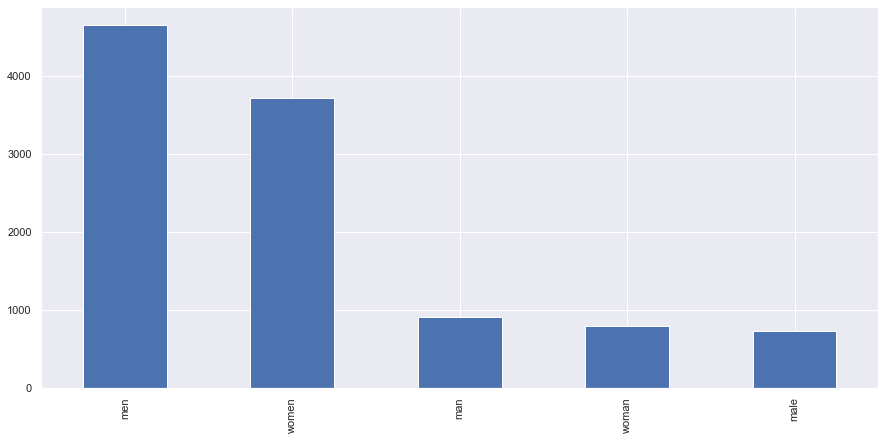

In [19]:
text_df.sum().sort_values(ascending = False).head(5).plot(kind='bar',figsize=(15,7));

In [20]:
text_df.shape

(5281, 10896)

In [21]:
tfid = TfidfVectorizer(stop_words=stop_words)
#Add the stop words so that we can get some actual idea of the most prevelent words
X = comb.text
tfid.fit(X)
text_tfid = tfid.transform(comb.text)
#Transform
text_df2 = pd.DataFrame(text_tfid.todense(), columns=tfid.get_feature_names())
text_df2

,aback,abandon,abandoned,abbreviation,abby,abc,abdicating,abdication,abducted,abducting,...,zeitgeist,zero,zilch,zodiac,zodilaces,zone,zones,zoning,zoom,zygomatic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
text_df2.drop([col for col, val in text_df2.sum().iteritems() if val < 10], axis=1, inplace=True)

In [23]:
text_df2.sum().sort_values(ascending = False).head(50)

men           226.582880
women         191.115602
man            70.468795
woman          63.440047
feminism       56.616998
rape           56.149049
feminists      54.477314
feminist       52.534637
male           51.469744
sex            41.940735
female         41.124198
isn            38.590388
twitter        35.602265
thing          35.551655
work           35.503953
equality       34.987107
saying         34.932002
gender         34.709024
hate           34.017636
trying         33.891542
problem        33.700242
got            33.420844
lot            33.331402
sub            32.982761
sure           32.860905
going          32.650588
understand     32.621915
does           32.574303
bad            32.553648
sexual         32.119148
years          32.097569
yeah           31.995539
issues         31.476995
let            31.128643
amp            30.582715
help           30.307910
use            30.181395
society        29.904091
violence       29.716379
believe        29.625568


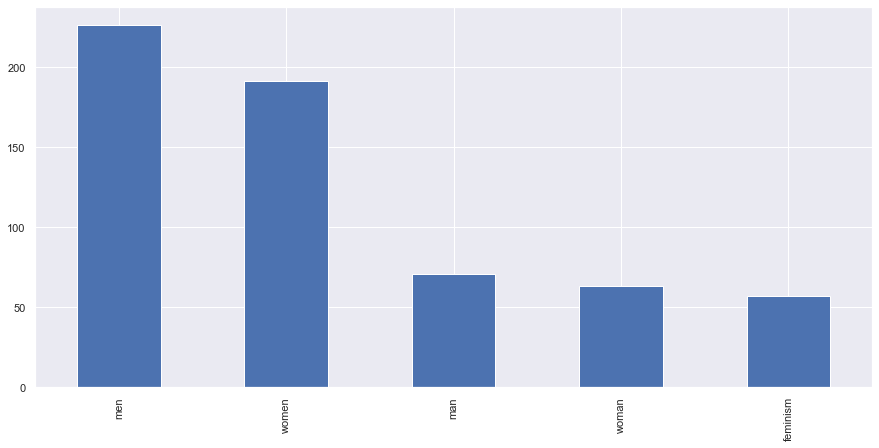

In [24]:
text_df2.sum().sort_values(ascending = False).head(5).plot(kind='bar',figsize=(15,7));

In [25]:
text_df.sum().sort_values(ascending = True).head(15)

entity           1
fraternity       1
dem              1
scrutinize       1
cast             1
belie            1
casino           1
ironies          1
menopause        1
predominantly    1
unvalidated      1
preemptively     1
belittling       1
fries            1
spank            1
dtype: int64

In [26]:
comb['length']=comb['text'].str.len()
comb['number_words'] = comb['text'].str.split().str.len()
comb.shape

(5281, 5)

In [27]:
comb = comb[comb['number_words'] > 10]
comb.shape


(4340, 5)

In [28]:

comb[['subreddit','created_utc','text']].to_csv('./data/z_complete/men.csv',index=False)

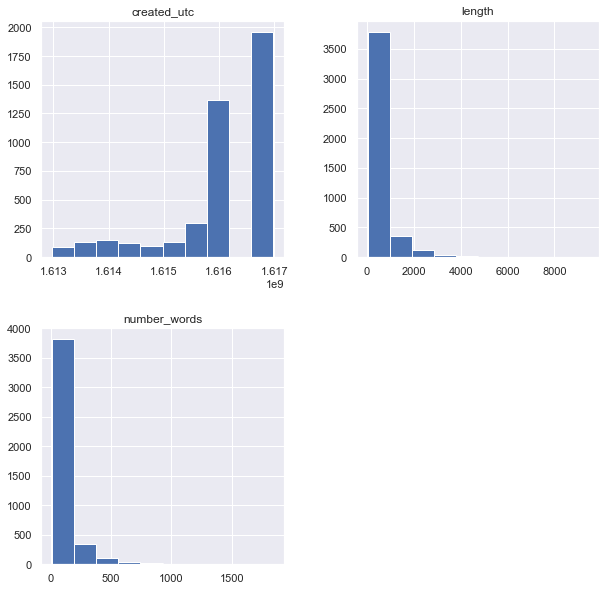

In [29]:
comb.hist(figsize=(10,10));

In [30]:
comb.describe()

,created_utc,length,number_words
count,4.340000e+03,4340.000000,4340.000000
mean,1.616086e+09,516.038249,96.979263
std,9.893153e+05,805.526552,150.960535
min,1.612980e+09,33.000000,11.000000
25%,1.615872e+09,126.000000,24.000000
50%,1.615991e+09,259.000000,49.000000
75%,1.616916e+09,551.000000,104.000000
max,1.616973e+09,9440.000000,1840.000000


Sentiment Analysis & Word analyis

In [31]:
from textblob import TextBlob
# Added an extra library
# for more info please visit: https://textblob.readthedocs.io/en/dev/quickstart.html#


In [32]:
def poles(text):
    try:
        return TextBlob(text).polarity
    #gives you the negative and positive scores of the post
    except:
        return None
def subj(text):
    try:
        return TextBlob(text).subjectivity
    #gives you the subjectivity of the words or sentences or fragments 
    except:
        return None

comb['polarity'] = comb['text'].apply(poles)
comb['subjectivity'] = comb['text'].apply(subj)
#Add them in 
comb.head()

,subreddit,text,created_utc,length,number_words,polarity,subjectivity
1,MensRights,Also a point to consider is that campaign was created by an ad agency co founded by Charles Saatchi The same guy who was cautioned by police a few years ago for putting his hands round the throat of his then wife Nigella Lawson while sat in public I ll not be taking lessons in behaviour from such a person,1616972828,308,60,-0.080000,0.238333
3,MensRights,It s not That same comparison gets made in every debate and thread related to this It won t make any impact other than to paint you as a racist in the eyes of the person you re making the point to,1616972806,197,42,-0.041667,0.300000
4,MensRights,You haven t searched the sOUrCEs you so desperately want right Of course you didn t right,1616972703,91,17,-0.009524,0.690476
5,MensRights,Saying that someone s comments about sexism is invalid because of there skin colour very good YOU ARE RACIST,1616972617,108,19,0.910000,0.780000
6,MensRights,This seems like the nuclear option I can t imagine him getting his job back after going public like this and even if he did with that contract he won t keep it longer than days I hope he s got a court case lined up,1616972597,217,46,0.000000,0.033333


In [33]:
comb.drop(columns=['subreddit','created_utc','text'],inplace=True)
#get rid of what we do not need any more to increase the speed

Lets visualize

I cant compare words one dataset just has double the samples in this one

what it precieves as negative and positive is extremely questionable
Feminism: polarity:0.073568/ subjectivity:0.489847

In [34]:
comb.describe()


,length,number_words,polarity,subjectivity
count,4340.000000,4340.000000,4340.000000,4340.000000
mean,516.038249,96.979263,0.049682,0.463823
std,805.526552,150.960535,0.211133,0.219344
min,33.000000,11.000000,-1.000000,0.000000
25%,126.000000,24.000000,-0.040909,0.361015
50%,259.000000,49.000000,0.040000,0.475694
75%,551.000000,104.000000,0.152900,0.587500
max,9440.000000,1840.000000,1.000000,1.000000


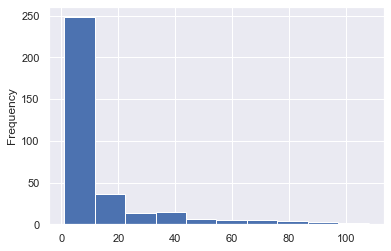

In [35]:
comb.groupby('number_words').size().plot.hist();


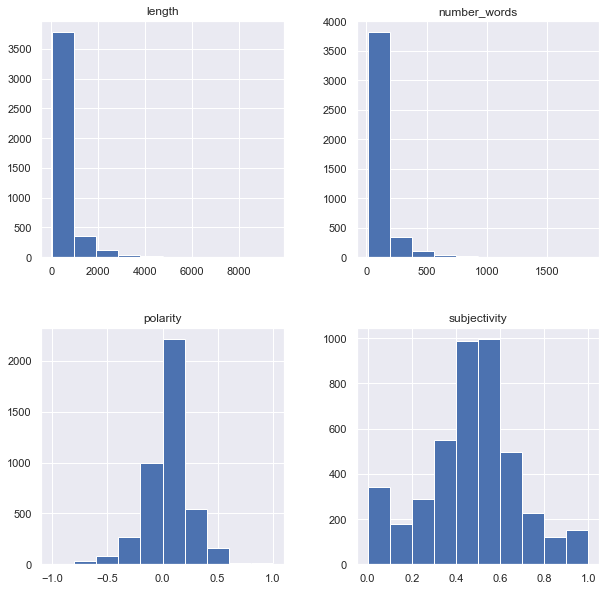

In [36]:
comb.hist(figsize=(10,10));

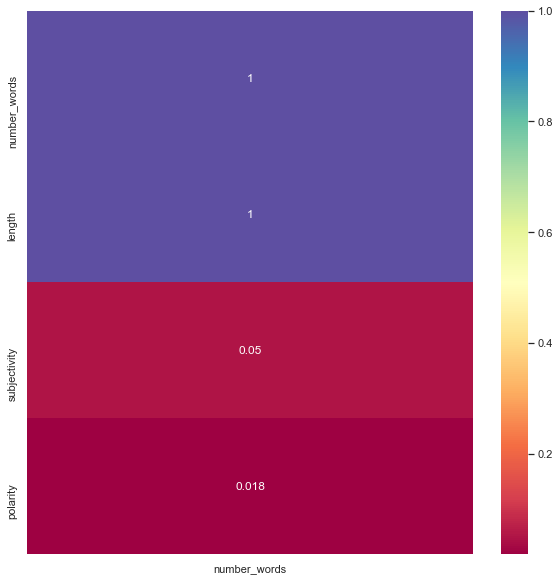

In [37]:
plt.figure(figsize=(10, 10))
plt.fontsize = 32
sns.heatmap(comb.corr()[['number_words']].sort_values('number_words', ascending=False), 
            annot=True, cmap='Spectral', vmax=1);
# the length of words and number of words is not going to really give us insight into the data. 
# We are not interested in the education of the users bc our goal is to gain insight into how we can get 
# This does not make me want to compare them.


Text(0.5, 1.0, "polarity's relationship to subjectivity in Men's")

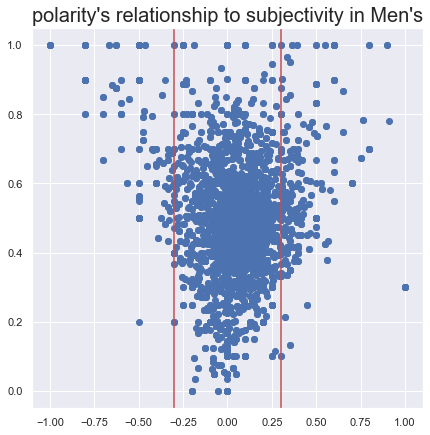

In [38]:
plt.figure(figsize=(7,7));
plt.scatter(x=comb['polarity'], y=comb['subjectivity']);
plt.axvline(-.3, color='r', linestyle='-',label='');
plt.axvline(.3, color='r', linestyle='-',label='');
plt.title("polarity's relationship to subjectivity in Men's", fontsize=20)
#The relationship between both meterics are really the same in each

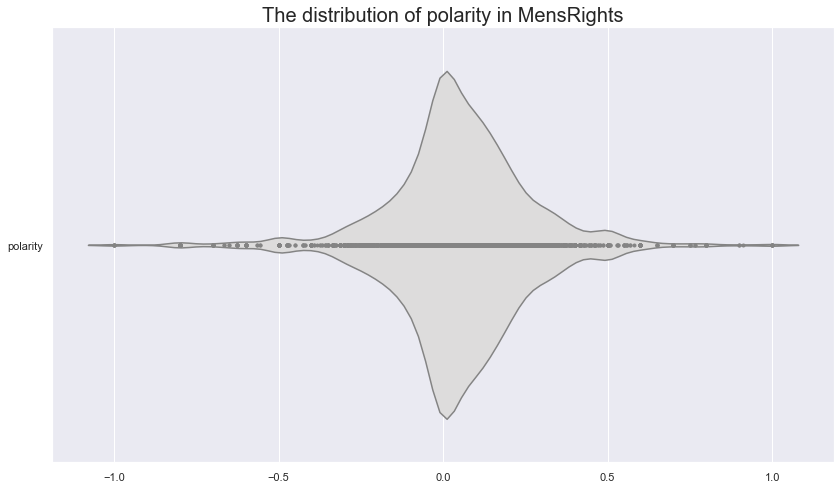

In [39]:
pole=comb[['polarity']]
plt.figure(figsize=(14,8));
sns.violinplot(data=pole, palette="coolwarm", inner="points", orient="h");
plt.title('The distribution of polarity in MensRights', fontsize=20);

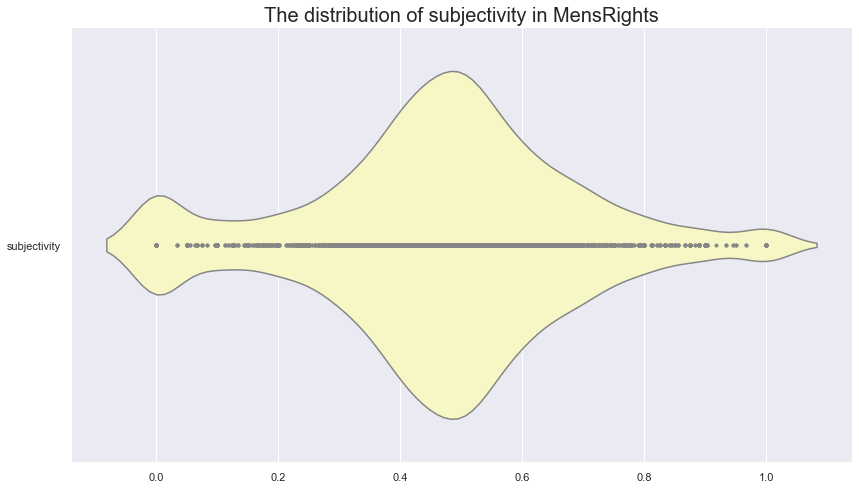

In [40]:
subj=comb[['subjectivity']]
plt.figure(figsize=(14,8));
sns.violinplot(data=subj, palette="Spectral", inner="points", orient="h");
plt.title('The distribution of subjectivity in MensRights', fontsize=20);